#**Jason Locke**
# **Deep Learning HW1**
# **10-4-2020**

# Problem 1

### Imports

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from keras import backend as kb
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
%matplotlib inline

### Load Data into Numpy Arrays

In [ ]:
#Using Keras load_data extract values for mnist into train and test values
#(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

#Using Keras load_data extract values for mnist into train and test values
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#What does the data look like?
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


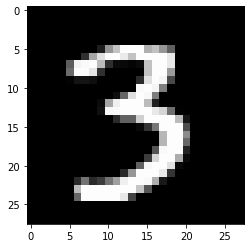

In [ ]:
# What does a sample image look like?  This is the 10,000th indexed value.  This looks like 3.
plt.imshow(X_train[10000], cmap='gray')
plt.show()

In [ ]:
# Is the label activated for 10,000 index to show 3?
y_train[10000]

3

The label shows 3, but this is a problem. We need to have categorical values of 0's and 1's as oposed to the actual labels.

In [ ]:
#Use Keras utility to transform labels into onehot encoding (binary categories)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
# This looks like a three, lets check label for the 10,000th index value.  Looks like the 3rd value (4th index) was activated.
y_train[10000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Create DL Model

In [ ]:
shape = (28, 28, 1) # Define shape of input for Keras model

model = keras.Sequential(
    [
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024,activation='relu'),
        tf.keras.layers.Dense(1024,activation='relu'),
        tf.keras.layers.Dense(1024,activation='relu'),
        tf.keras.layers.Dense(1024,activation='relu'),
        tf.keras.layers.Dense(1024,activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1

### Compile and Fit DL Model

In [ ]:
#Define model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Fit model
model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 3s 4ms/step - loss: 0.2430 - accuracy: 0.9309 - val_loss: 0.1202 - val_accuracy: 0.9655
Epoch 2/10
844/844 [==============================] - 3s 4ms/step - loss: 0.1177 - accuracy: 0.9682 - val_loss: 0.0974 - val_accuracy: 0.9738
Epoch 3/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0901 - accuracy: 0.9757 - val_loss: 0.0945 - val_accuracy: 0.9753
Epoch 4/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0732 - accuracy: 0.9810 - val_loss: 0.0824 - val_accuracy: 0.9777
Epoch 5/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0599 - accuracy: 0.9836 - val_loss: 0.1060 - val_accuracy: 0.9755
Epoch 6/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0561 - accuracy: 0.9855 - val_loss: 0.1002 - val_accuracy: 0.9757
Epoch 7/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0416 - accuracy: 0.9890 - val_loss: 0.0949 - val_accuracy: 0.9800
Epoch 

### Evaluate Test Data

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.1078 - accuracy: 0.9811


### Create Function to extract layer data

In [ ]:
def extract_layer_output(data, layer_index):
  layer_output = []
  keras_function = kb.function([model.input], [model.get_layer(index=layer_index).output])
  layer_output.append(keras_function([data, 1]))
  layer_output = np.squeeze(layer_output) # remove all dimensions of size 1 i.e., (1,1,10000,1024) to (10000, 1024)
  return(layer_output)

### Test Data Analysis

In [ ]:
#Get 1000 samples from test data
X_test_1000 = X_test[0:1000]
y_test_1000 = y_test[0:1000]

### Softmax Predictions

In [ ]:
#Get softmax layer output for 1000 test samples
softmax_output = extract_layer_output(X_test_1000, 6) #6 is last softmax layer

#Get max index for each matrix (convert from matrix of 10 labels to 1 which is the prediction)
softmax_output = np.argmax(softmax_output,axis=1)

In [ ]:
softmax_output.shape

(1000,)

In [ ]:
#Get the first 10 predictions for each nbr from 0-10.  First 10 are 0, then 1, etc..
l = []
for x in range(0,10):
    t = np.where(softmax_output==x)
    t = np.array(t)
    t = np.squeeze(t)
    t = t[0:10]
    l.append(t)
l = np.array(l)
l = l.reshape(100)

In [ ]:
print(l)

[  3  10  13  25  28  55  69  71 101 126   2   5  14  29  31  37  39  40
  46  57   1  35  38  43  47  72  77  82 106 119  18  30  32  44  51  63
  68  76  87  90   4   6  19  24  27  33  42  48  49  56   8  15  23  45
  52  53  59 102 120 127  11  21  22  50  54  66  81  88  91  98   0  17
  26  34  36  41  60  64  70  75  61  84 110 128 134 146 177 179 181 184
   7   9  12  16  20  58  62  73  78  92]


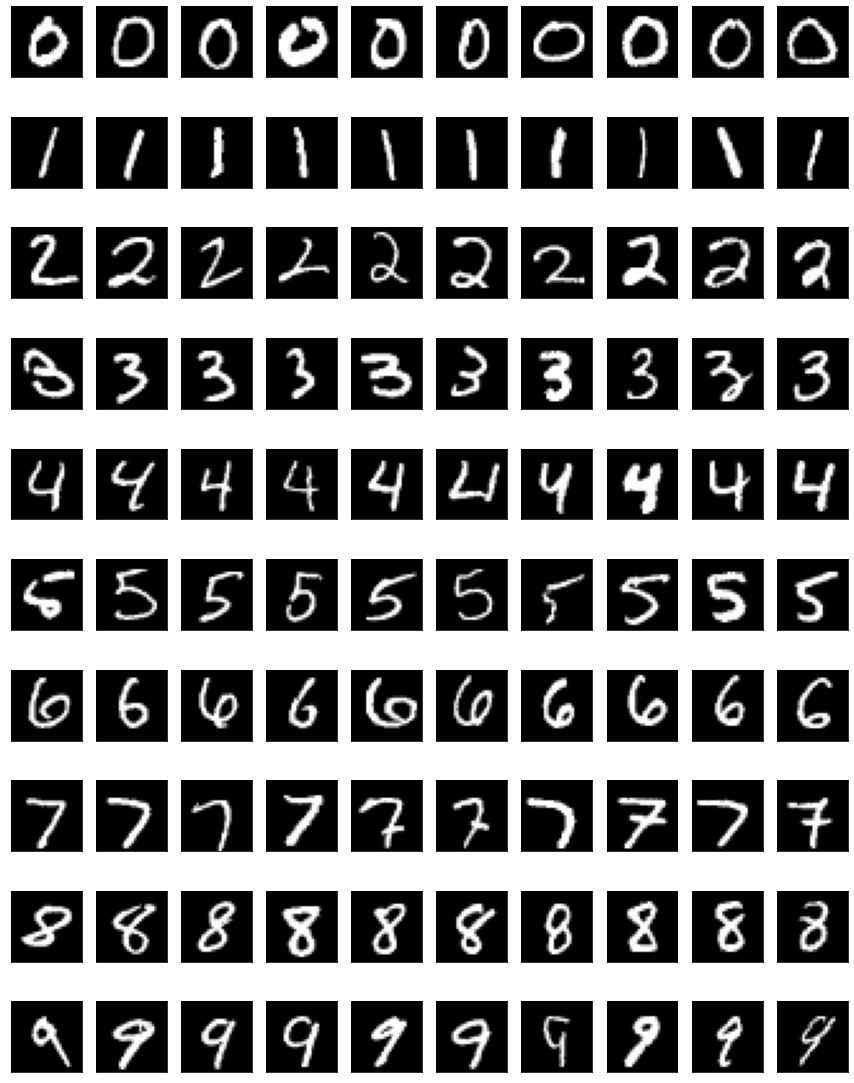

In [ ]:
#Create 10X10 plot that shows predictions for first 10 of each nbr.  If predictions are good all nbrs should match on each row
num_row = 10
num_col = 10

fig = plt.figure
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i,tt in enumerate(l):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_test_1000[tt], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()


### Second to Last Layer Predictions

In [ ]:
#Get softmax layer output for 1000 test samples
secondlast = extract_layer_output(X_test_1000, 5) #5 is the second to last layer (last hidden)

#Get max index for each matrix (convert from matrix of 10 labels to 1 which is the prediction)
#secondlast = extract_layer_output(X_test_1000, 5) #6 is current last softmax layer

In [ ]:
#Select 10 random int's
int = np.random.randint(0,secondlast.shape[1],10)
int = np.sort(int)

In [ ]:
secondlast = secondlast[:,int]

In [ ]:
#Get max index for each matrix (convert from matrix of 10 labels to 1 which is the prediction)
secondlast = np.argmax(secondlast,axis=1)

In [ ]:
#Get the first 10 predictions for each nbr from 0-10.  First 10 are 0, then 1, etc..
l = []
for x in range(0,10):
    t = np.where(secondlast==x)
    t = np.array(t)
    if t.size < 10:
      t = np.full(10,-1)
    t = np.array(t)
    t = np.squeeze(t)
    t = t[0:10]
    l.append(t)
l = np.array(l)
l = l.reshape(100)

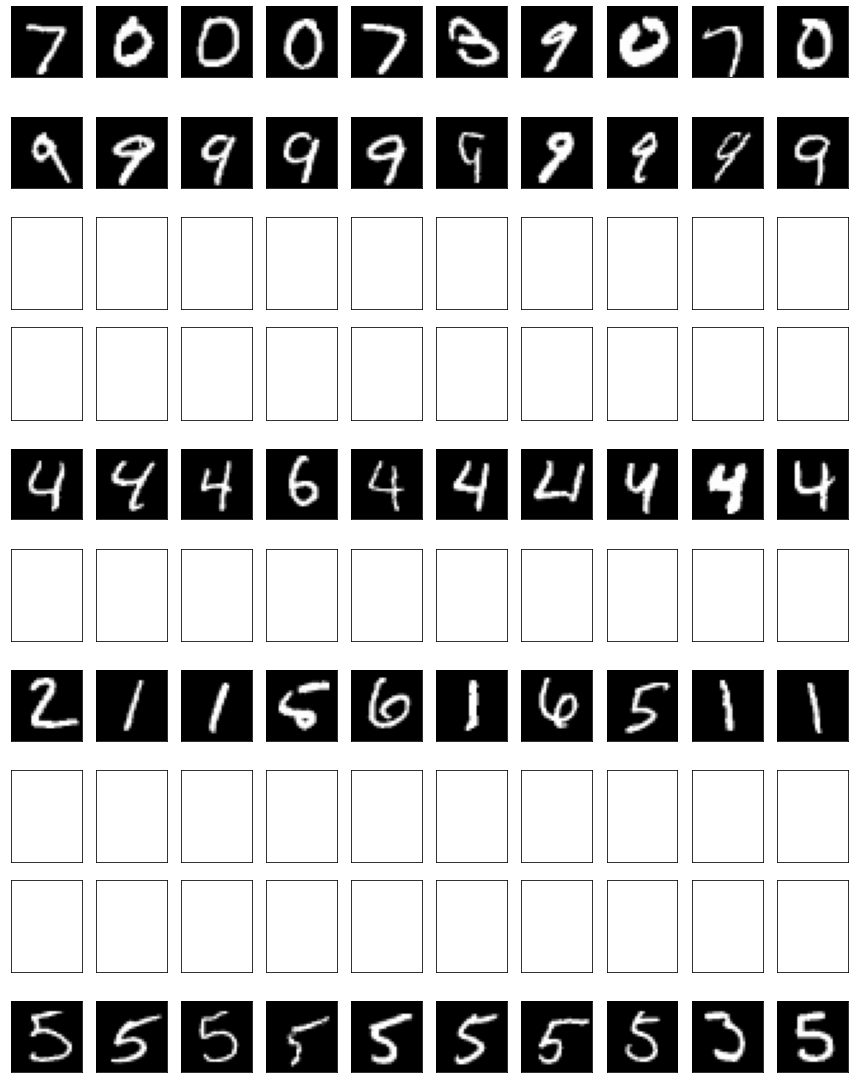

In [ ]:
#Create 10X10 plot that shows predictions for first 10 of each nbr.  If predictions are good all nbrs should match on each row
num_row = 10
num_col = 10

fig = plt.figure
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i,tt in enumerate(l):
    ax = axes[i//num_col, i%num_col]
    #print(tt)
    if tt==-1:
      ''
    else:
      ax.imshow(X_test_1000[tt], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

### Analysis
These results were confusing to me and really dont make sense.  Since the 10 of the 1024 dimensions are chosen at random there is no way to tie them back to actual labels. The results are very random and do not help explain relationships in the data compared to the actual labels.  It does appear to somewhat group results, but is not clear to me how this would be helpful.

### Apply TSNE to reduce and visualize dimensions

In [ ]:
#Create funtion to generate DF's for dimensions and means for visualization 
def createDF(data, labels):
  df_test = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1], 'label': labels})
  df_mean = df_test.groupby('label').mean()
  return df_test, df_mean

In [ ]:
#Convert test labels to true values by index
test_labels = np.argmax(y_test_1000,axis=1)

#### Raw Data - 1000 examples

In [ ]:
#Apply TSNE to test data
layer_data = TSNE(n_components=2).fit_transform(X_test_1000.reshape(1000,784))

#Call function to get DF and DF with mean values for visualization
df_test, df_mean = createDF(layer_data, test_labels)

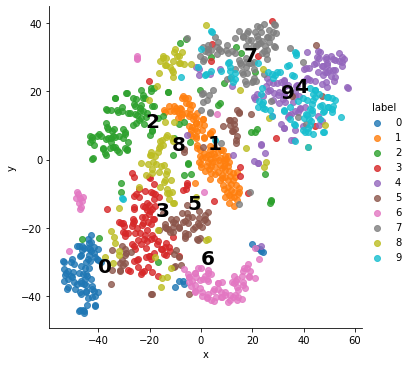

In [ ]:
#Plot 1000 test examples using TSNE dimension reduction
p1 = sns.lmplot(data=df_test, x="x", y="y", fit_reg=False, hue="label")

for index, row in df_mean.iterrows():
    plt.annotate(index, xy=(row[0],row[1]), weight='bold', fontsize=20)

#sns.plt.show()

#### First Layer - 1000 examples

In [ ]:
#Get first layer output for 1000 test samples
layer_data = extract_layer_output(X_test_1000, 1)

#Apply TSNE to test data
layer_data = TSNE(n_components=2).fit_transform(layer_data.reshape(1000,1024))

#Call function to get DF and DF with mean values for visualization
df_test, df_mean = createDF(layer_data, test_labels)

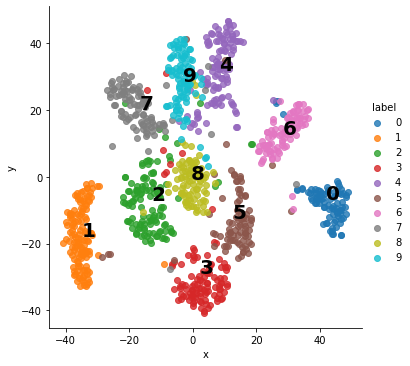

In [ ]:
#Plot 1000 test examples using TSNE dimension reduction
p1 = sns.lmplot(data=df_test, x="x", y="y", fit_reg=False, hue="label")

for index, row in df_mean.iterrows():
    plt.annotate(index, xy=(row[0],row[1]), weight='bold', fontsize=20)

#sns.plt.show()

#### 2nd Layer - 1000 examples

In [ ]:
#Get second layer output for 1000 test samples
layer_data = extract_layer_output(X_test_1000, 2)

#Apply TSNE to test data
layer_data = TSNE(n_components=2).fit_transform(layer_data.reshape(1000,1024))

#Call function to get DF and DF with mean values for visualization
df_test, df_mean = createDF(layer_data, test_labels)

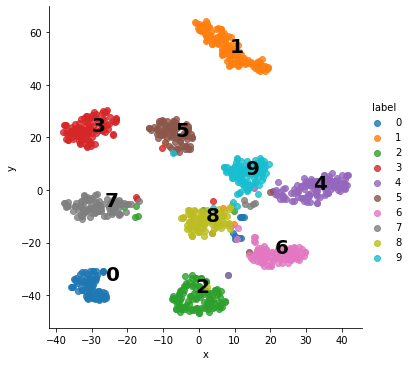

In [ ]:
#Plot 1000 test examples using TSNE dimension reduction
p1 = sns.lmplot(data=df_test, x="x", y="y", fit_reg=False, hue="label")

for index, row in df_mean.iterrows():
    plt.annotate(index, xy=(row[0],row[1]), weight='bold', fontsize=20)

#sns.plt.show()

#### 3rd Layer - 1000 examples

In [ ]:
#Get third layer output for 1000 test samples
layer_data = extract_layer_output(X_test_1000, 3)

#Apply TSNE to test data
layer_data = TSNE(n_components=2).fit_transform(layer_data.reshape(1000,1024))

#Call function to get DF and DF with mean values for visualization
df_test, df_mean = createDF(layer_data, test_labels)

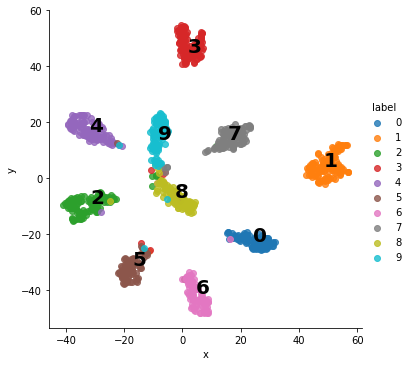

In [ ]:
#Plot 1000 test examples using TSNE dimension reduction
p1 = sns.lmplot(data=df_test, x="x", y="y", fit_reg=False, hue="label")

for index, row in df_mean.iterrows():
    plt.annotate(index, xy=(row[0],row[1]), weight='bold', fontsize=20)

#sns.plt.show()

#### 4th Layer - 1000 examples

In [ ]:
#Get fourth layer output for 1000 test samples
layer_data = extract_layer_output(X_test_1000, 4)

#Apply TSNE to test data
layer_data = TSNE(n_components=2).fit_transform(layer_data.reshape(1000,1024))

#Call function to get DF and DF with mean values for visualization
df_test, df_mean = createDF(layer_data, test_labels)

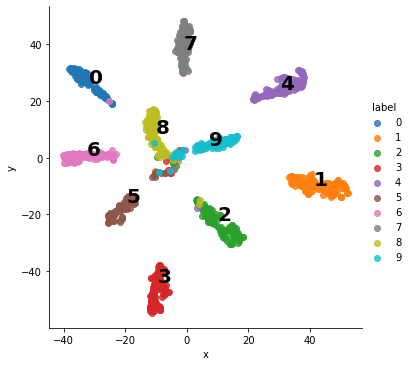

In [ ]:
#Plot 1000 test examples using TSNE dimension reduction
p1 = sns.lmplot(data=df_test, x="x", y="y", fit_reg=False, hue="label")

for index, row in df_mean.iterrows():
    plt.annotate(index, xy=(row[0],row[1]), weight='bold', fontsize=20)

#sns.plt.show()

#### 5th Layer - 1000 examples

In [ ]:
#Get fifth layer output for 1000 test samples
layer_data = extract_layer_output(X_test_1000, 5)

#Apply TSNE to test data
layer_data = TSNE(n_components=2).fit_transform(layer_data.reshape(1000,1024))

#Call function to get DF and DF with mean values for visualization
df_test, df_mean = createDF(layer_data, test_labels)

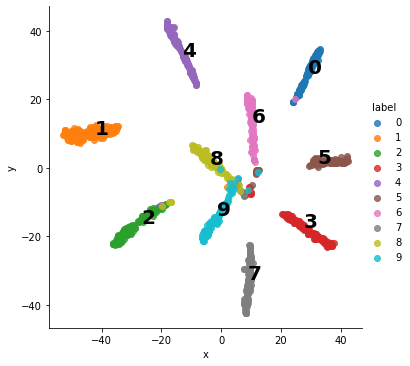

In [ ]:
#Plot 1000 test examples using TSNE dimension reduction
p1 = sns.lmplot(data=df_test, x="x", y="y", fit_reg=False, hue="label")

for index, row in df_mean.iterrows():
    plt.annotate(index, xy=(row[0],row[1]), weight='bold', fontsize=20)

#sns.plt.show()

#### Last Layer (softmax) - 1000 examples

In [ ]:
#Get last layer output for 1000 test samples
layer_data = extract_layer_output(X_test_1000, 6)

#Apply TSNE to test data
layer_data = TSNE(n_components=2).fit_transform(layer_data.reshape(1000,10))

#Call function to get DF and DF with mean values for visualization
df_test, df_mean = createDF(layer_data, test_labels)

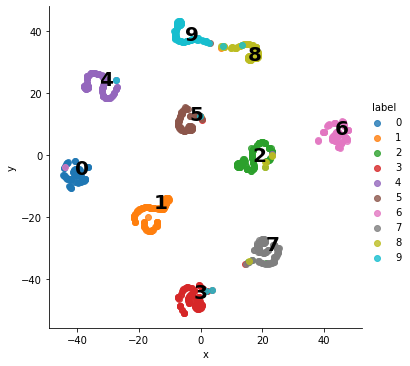

In [ ]:
#Plot 1000 test examples using TSNE dimension reduction
p1 = sns.lmplot(data=df_test, x="x", y="y", fit_reg=False, hue="label")

for index, row in df_mean.iterrows():
    plt.annotate(index, xy=(row[0],row[1]), weight='bold', fontsize=20)

#sns.plt.show()

### Analysis
I tried both PCA and TSNE and TSNE results were much easier for me to undestand.  As I reduced the dimensions for each layer the groupings get closer and closer as you make it to the last layer (softmax output).  Using dimension reduction does seem very helpful for understandnig the population of the data.

# Problem 2

### Imports

In [ ]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import scipy
!pip install librosa # in colab, you’ll need to install this
import librosa

In [ ]:
def readAudio(file_name):
  s, sr = librosa.load(file_name, sr=None)
  S = librosa.stft(s, n_fft=1024, hop_length=512)
  S_abs = np.abs(S).T #get absolute values and transpose
  S = S.T #transpose values

  return(S, S_abs, sr)

In [ ]:
#Read main and test audio files and convert to spectrograms
X_train, X_train_abs, sr = readAudio('train_clean_male.wav')
y_train, y_train_abs, sr = readAudio('train_dirty_male.wav')
test1, test1_abs, sr = readAudio('test_x_01.wav')
test2, test2_abs, sr = readAudio('test_x_02.wav')

In [ ]:
#Read in main audio files and convert to spectrograms
#s, sr = librosa.load('train_clean_male.wav', sr=None)
#S = librosa.stft(s, n_fft=1024, hop_length=512)
#sn, sr = librosa.load('train_dirty_male.wav', sr=None)
#X = librosa.stft(sn, n_fft=1024, hop_length=512)

#Read in test audio files and convert to spectrograms
#X, sr = librosa.load('test_x_01.wav', sr=None)
#X_test = librosa.stft(X, n_fft=1024, hop_length=512)
#X, sr = librosa.load('test_x_02.wav', sr=None)
#X_test2 = librosa.stft(X, n_fft=1024, hop_length=512)

In [ ]:
#S = np.abs(S)
#S=S.T
#X = np.abs(X)
#X=X.T

In [ ]:
#Create DNN model with 2 hidden layers
shape = (2459, 513) # Define shape of input for Keras model

model = keras.Sequential(
    [
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.Dense(513,activation='relu'),
        tf.keras.layers.Dense(513,activation='relu'),
        tf.keras.layers.Dense(513, activation='relu')
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 2459, 513)         263682    
_________________________________________________________________
dense_10 (Dense)             (None, 2459, 513)         263682    
_________________________________________________________________
dense_11 (Dense)             (None, 2459, 513)         263682    
Total params: 791,046
Trainable params: 791,046
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compile and fit the model
model.compile(loss="MeanSquaredError", optimizer="adam", metrics=["accuracy"])

model.fit(X_train_abs, y_train_abs, batch_size=50, epochs=50, validation_split=0.1)

Epoch 1/50
45/45 [==============================] - 0s 5ms/step - loss: 0.0659 - accuracy: 0.2015 - val_loss: 0.0425 - val_accuracy: 0.3537
Epoch 2/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0373 - accuracy: 0.4076 - val_loss: 0.0380 - val_accuracy: 0.3740
Epoch 3/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.4510 - val_loss: 0.0359 - val_accuracy: 0.4553
Epoch 4/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.5011 - val_loss: 0.0345 - val_accuracy: 0.4593
Epoch 5/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.5011 - val_loss: 0.0338 - val_accuracy: 0.4675
Epoch 6/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.5368 - val_loss: 0.0326 - val_accuracy: 0.4878
Epoch 7/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.5404 - val_loss: 0.0333 - val_accuracy: 0.4919
Epoch 8/50
45/45 [==

In [ ]:
#Read in test audio files and convert to spectrograms
#test1, sr=librosa.load('test_x_01.wav', sr=None)
#TEST1=librosa.stft(test1, n_fft=1024, hop_length=512)
#test2, sr=librosa.load('test_x_02.wav', sr=None)
#TEST2=librosa.stft(test2, n_fft=1024, hop_length=512)

In [ ]:
#Get absolute values
#TEST1_abs = np.abs(TEST1)
#TEST2_abs = np.abs(TEST2)

In [ ]:
#Use trained models to perform predictions
test1_predict = model.predict(test1_abs)
test2_predict = model.predict(test2_abs)

In [ ]:
s1 = np.multiply((test1/test1_abs).T, np.abs(test1_predict).T)
s2 = np.multiply((test2/test2_abs).T, np.abs(test2_predict).T)

In [ ]:
scipy.signal.istft(s1)
sh_test1 = scipy.signal.istft(s1)
scipy.signal.istft(s2)
sh_test2 = scipy.signal.istft(s2)

In [ ]:
#Conver to Numpy Arrays
sh_test1 = np.array(sh_test1)
sh_test2 = np.array(sh_test2)

In [ ]:
librosa.output.write_wav('test_s_01_recons.wav', sh_test1, sr)
librosa.output.write_wav('test_s_02_recons.wav', sh_test2, sr)

In [204]:
from IPython.display import Audio
Audio('test_s_01_recons.wav')

In [205]:
from IPython.display import Audio
Audio('test_s_02_recons.wav')

#Problem 3

## SGD

### Imports

In [ ]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
#Using Keras load_data extract values for mnist into train and test values
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [ ]:
#Use Keras utility to transform labels into onehot encoding (binary categories)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### (a) Activation function: the logistic sigmoid function; initialization: random numbers gen-erated from the normal distribution (μ = 0, σ = 0.01)

In [ ]:
shape = (28, 28) # Define shape of input for Keras model

init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)

model = keras.Sequential(
    [
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=init)
    ]
)

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_49 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_50 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_51 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_52 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_53 (Dense)             (None, 10)               

In [ ]:
opt = keras.optimizers.SGD(learning_rate=.01)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) #categorical_crossentropy
history = model.fit(X_train, y_train, batch_size=64, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
938/938 [==============================] - 3s 3ms/step - loss: 2.3060 - accuracy: 0.1043 - val_loss: 2.3111 - val_accuracy: 0.1010
Epoch 2/200
938/938 [==============================] - 3s 3ms/step - loss: 2.3059 - accuracy: 0.1059 - val_loss: 2.3042 - val_accuracy: 0.1010
Epoch 3/200
938/938 [==============================] - 3s 3ms/step - loss: 2.3060 - accuracy: 0.1039 - val_loss: 2.3039 - val_accuracy: 0.1028
Epoch 4/200
938/938 [==============================] - 3s 3ms/step - loss: 2.3060 - accuracy: 0.1054 - val_loss: 2.3080 - val_accuracy: 0.1028
Epoch 5/200
938/938 [==============================] - 3s 3ms/step - loss: 2.3057 - accuracy: 0.1055 - val_loss: 2.3075 - val_accuracy: 0.1009
Epoch 6/200
938/938 [==============================] - 3s 3ms/step - loss: 2.3058 - accuracy: 0.1063 - val_loss: 2.3084 - val_accuracy: 0.1135
Epoch 7/200
938/938 [==============================] - 3s 3ms/step - loss: 2.3058 - accuracy: 0.1058 - val_loss: 2.3072 - val_accuracy: 0.1009

### (b) Activation function: the logistic sigmoid function; initialization: Xavier initializer

In [ ]:
shape = (28, 28) # Define shape of input for Keras model

init = tf.keras.initializers.GlorotNormal(seed=None)

model = keras.Sequential(
    [
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=init)
    ]
)

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_55 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_56 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_57 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_58 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_59 (Dense)             (None, 10)               

In [ ]:
opt = keras.optimizers.SGD(learning_rate=.01)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) #categorical_crossentropy
history1 = model.fit(X_train, y_train, batch_size=64, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
938/938 [==============================] - 3s 3ms/step - loss: 2.3078 - accuracy: 0.1043 - val_loss: 2.3109 - val_accuracy: 0.1135
Epoch 2/200
938/938 [==============================] - 3s 3ms/step - loss: 2.3065 - accuracy: 0.1063 - val_loss: 2.3083 - val_accuracy: 0.1010
Epoch 3/200
938/938 [==============================] - 3s 3ms/step - loss: 2.3066 - accuracy: 0.1057 - val_loss: 2.3127 - val_accuracy: 0.1010
Epoch 4/200
938/938 [==============================] - 3s 3ms/step - loss: 2.3067 - accuracy: 0.1056 - val_loss: 2.3029 - val_accuracy: 0.0980
Epoch 5/200
938/938 [==============================] - 3s 3ms/step - loss: 2.3066 - accuracy: 0.1043 - val_loss: 2.3063 - val_accuracy: 0.0958
Epoch 6/200
938/938 [==============================] - 3s 3ms/step - loss: 2.3063 - accuracy: 0.1063 - val_loss: 2.3069 - val_accuracy: 0.1028
Epoch 7/200
938/938 [==============================] - 3s 3ms/step - loss: 2.3062 - accuracy: 0.1041 - val_loss: 2.3083 - val_accuracy: 0.1010

### (c) Activation function: ReLU; initialization: random numbers generated from the normal
distribution (μ = 0, σ = 0.01)

In [ ]:
shape = (28, 28) # Define shape of input for Keras model

init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)

model = keras.Sequential(
    [
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=init)
    ]
)

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_61 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_62 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_63 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_64 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_65 (Dense)             (None, 10)              

In [ ]:
opt = keras.optimizers.SGD(learning_rate=.01)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) #categorical_crossentropy
history2 = model.fit(X_train, y_train, batch_size=64, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1120 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 2/200
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/200
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/200
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/200
938/938 [==============================] - 3s 4ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/200
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/200
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135

### (d) Activation function: ReLU; initialization: Xavier initializer

In [ ]:
shape = (28, 28) # Define shape of input for Keras model

init = tf.keras.initializers.GlorotNormal(seed=None)

model = keras.Sequential(
    [
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=init)
    ]
)

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_67 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_68 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_69 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_70 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_71 (Dense)             (None, 10)              

In [ ]:
opt = keras.optimizers.SGD(learning_rate=.01) #learning_rate=1.0 for SGD
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) #categorical_crossentropy
history3 = model.fit(X_train, y_train, batch_size=64, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
938/938 [==============================] - 3s 3ms/step - loss: 0.8977 - accuracy: 0.7730 - val_loss: 0.3496 - val_accuracy: 0.9001
Epoch 2/200
938/938 [==============================] - 3s 3ms/step - loss: 0.2921 - accuracy: 0.9151 - val_loss: 0.2622 - val_accuracy: 0.9233
Epoch 3/200
938/938 [==============================] - 3s 3ms/step - loss: 0.2230 - accuracy: 0.9346 - val_loss: 0.1998 - val_accuracy: 0.9398
Epoch 4/200
938/938 [==============================] - 3s 3ms/step - loss: 0.1809 - accuracy: 0.9469 - val_loss: 0.1613 - val_accuracy: 0.9509
Epoch 5/200
938/938 [==============================] - 3s 3ms/step - loss: 0.1529 - accuracy: 0.9557 - val_loss: 0.1406 - val_accuracy: 0.9578
Epoch 6/200
938/938 [==============================] - 3s 3ms/step - loss: 0.1315 - accuracy: 0.9618 - val_loss: 0.1319 - val_accuracy: 0.9613
Epoch 7/200
938/938 [==============================] - 3s 3ms/step - loss: 0.1152 - accuracy: 0.9667 - val_loss: 0.1193 - val_accuracy: 0.9653

### (e) Activation function: ReLU; initialization: Kaiming He’s initializer

In [ ]:
shape = (28, 28) # Define shape of input for Keras model

init = tf.keras.initializers.HeNormal(seed=None)

model = keras.Sequential(
    [
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=init)
    ]
)

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_73 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_74 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_75 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_76 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_77 (Dense)             (None, 10)              

In [ ]:
opt = keras.optimizers.SGD(learning_rate=.01) #learning_rate=1.0 for SGD
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) #categorical_crossentropy
history4 = model.fit(X_train, y_train, batch_size=64, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
938/938 [==============================] - 3s 3ms/step - loss: 0.4928 - accuracy: 0.8651 - val_loss: 0.2472 - val_accuracy: 0.9233
Epoch 2/200
938/938 [==============================] - 3s 3ms/step - loss: 0.2065 - accuracy: 0.9394 - val_loss: 0.1962 - val_accuracy: 0.9422
Epoch 3/200
938/938 [==============================] - 3s 3ms/step - loss: 0.1548 - accuracy: 0.9543 - val_loss: 0.1572 - val_accuracy: 0.9541
Epoch 4/200
938/938 [==============================] - 3s 3ms/step - loss: 0.1245 - accuracy: 0.9632 - val_loss: 0.1322 - val_accuracy: 0.9588
Epoch 5/200
938/938 [==============================] - 3s 3ms/step - loss: 0.1033 - accuracy: 0.9694 - val_loss: 0.1237 - val_accuracy: 0.9627
Epoch 6/200
938/938 [==============================] - 3s 3ms/step - loss: 0.0876 - accuracy: 0.9741 - val_loss: 0.1034 - val_accuracy: 0.9708
Epoch 7/200
938/938 [==============================] - 3s 3ms/step - loss: 0.0748 - accuracy: 0.9779 - val_loss: 0.1010 - val_accuracy: 0.9693

### Visualize SGD Results

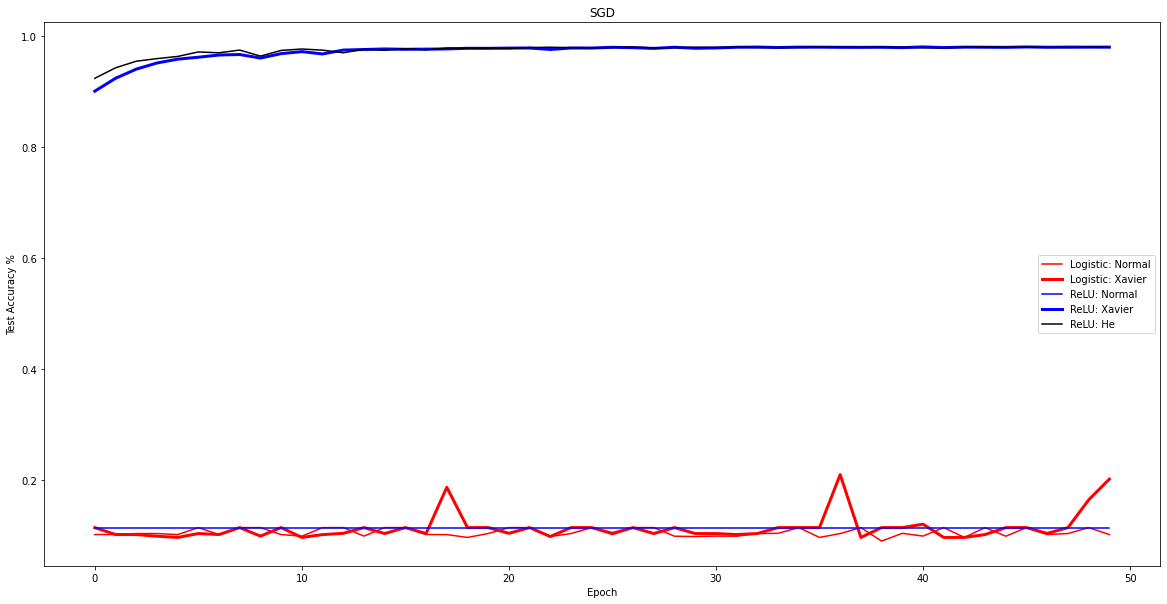

In [ ]:
#loss_train = history.history['accuracy']
test_acc = history.history['val_accuracy'][0:50]
test_acc1 = history1.history['val_accuracy'][0:50]
test_acc2 = history2.history['val_accuracy'][0:50]
test_acc3 = history3.history['val_accuracy'][0:50]
test_acc4 = history4.history['val_accuracy'][0:50]

epochs = range(0,50)
plt.figure(figsize=(20,10))
plt.plot(epochs, test_acc, 'r', label='Logistic: Normal')
plt.plot(epochs, test_acc1, 'r', label='Logistic: Xavier', linewidth=3)
plt.plot(epochs, test_acc2, 'b', label='ReLU: Normal')
plt.plot(epochs, test_acc3, 'b', label='ReLU: Xavier', linewidth=3)
plt.plot(epochs, test_acc4, 'black', label='ReLU: He')
plt.title('SGD')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy %')
plt.legend()
plt.show()

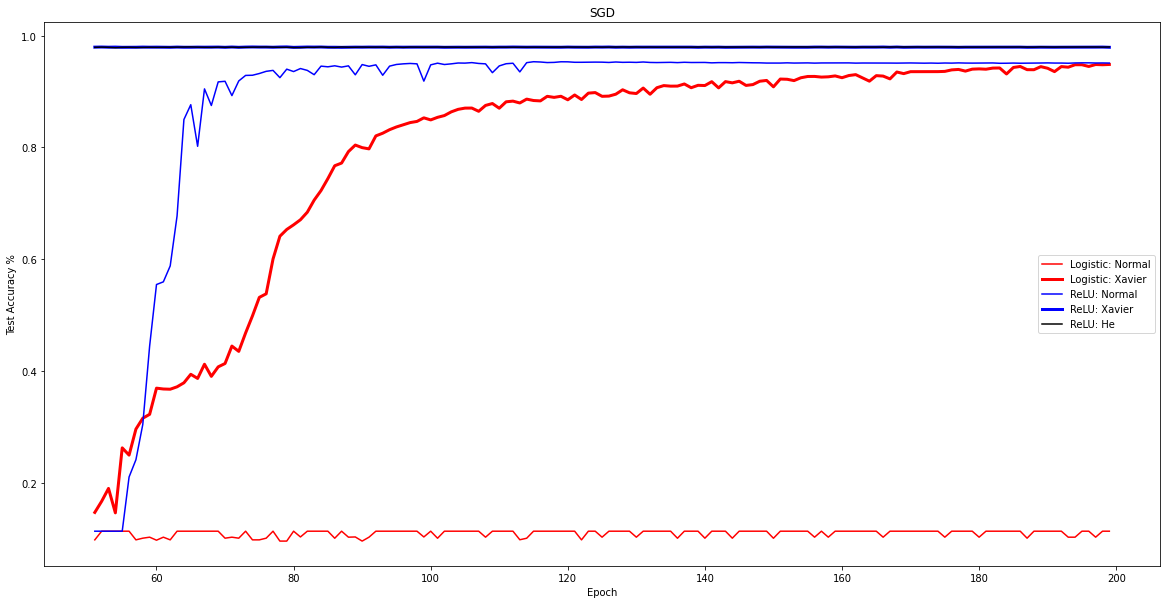

In [ ]:
#loss_train = history.history['accuracy']
test_acc = history.history['val_accuracy'][51:]
test_acc1 = history1.history['val_accuracy'][51:]
test_acc2 = history2.history['val_accuracy'][51:]
test_acc3 = history3.history['val_accuracy'][51:]
test_acc4 = history4.history['val_accuracy'][51:]

epochs = range(51,200)
plt.figure(figsize=(20,10))
plt.plot(epochs, test_acc, 'r', label='Logistic: Normal')
plt.plot(epochs, test_acc1, 'r', label='Logistic: Xavier', linewidth=3)
plt.plot(epochs, test_acc2, 'b', label='ReLU: Normal')
plt.plot(epochs, test_acc3, 'b', label='ReLU: Xavier', linewidth=3)
plt.plot(epochs, test_acc4, 'black', label='ReLU: He')
plt.title('SGD')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy %')
plt.legend()
plt.show()

## Adam

### (a) Activation function: the logistic sigmoid function; initialization: random numbers gen-erated from the normal distribution (μ = 0, σ = 0.01)

In [ ]:
shape = (28, 28) # Define shape of input for Keras model

init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)

model = keras.Sequential(
    [
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.Flatten(),
        #tf.keras.layers.Dense(512,kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=init)
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_23 (Dense)             (None, 10)               

In [ ]:
opt = keras.optimizers.Adam() #learning_rate=1.0 for SGD
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) #categorical_crossentropy
historya = model.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 2.1356 - accuracy: 0.1633 - val_loss: 1.9725 - val_accuracy: 0.2173
Epoch 2/200
469/469 [==============================] - 2s 3ms/step - loss: 1.3498 - accuracy: 0.4763 - val_loss: 0.7668 - val_accuracy: 0.7515
Epoch 3/200
469/469 [==============================] - 2s 3ms/step - loss: 0.4624 - accuracy: 0.8750 - val_loss: 0.3131 - val_accuracy: 0.9143
Epoch 4/200
469/469 [==============================] - 2s 3ms/step - loss: 0.2746 - accuracy: 0.9271 - val_loss: 0.2702 - val_accuracy: 0.9296
Epoch 5/200
469/469 [==============================] - 2s 3ms/step - loss: 0.2111 - accuracy: 0.9431 - val_loss: 0.2163 - val_accuracy: 0.9406
Epoch 6/200
469/469 [==============================] - 2s 3ms/step - loss: 0.1697 - accuracy: 0.9540 - val_loss: 0.1626 - val_accuracy: 0.9569
Epoch 7/200
469/469 [==============================] - 2s 3ms/step - loss: 0.1388 - accuracy: 0.9618 - val_loss: 0.1526 - val_accuracy: 0.9587

### (b) Activation function: the logistic sigmoid function; initialization: Xavier initializer

In [ ]:
shape = (28, 28) # Define shape of input for Keras model

init = tf.keras.initializers.GlorotNormal(seed=None)

model = keras.Sequential(
    [
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.Flatten(),
        #tf.keras.layers.Dense(512,kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=init)
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_28 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_29 (Dense)             (None, 10)               

In [ ]:
opt = keras.optimizers.Adam() #learning_rate=1.0 for SGD
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) #categorical_crossentropy
historya1 = model.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 0.8131 - accuracy: 0.7149 - val_loss: 0.3044 - val_accuracy: 0.9094
Epoch 2/200
469/469 [==============================] - 2s 3ms/step - loss: 0.2390 - accuracy: 0.9298 - val_loss: 0.1955 - val_accuracy: 0.9406
Epoch 3/200
469/469 [==============================] - 2s 3ms/step - loss: 0.1628 - accuracy: 0.9516 - val_loss: 0.1500 - val_accuracy: 0.9555
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1233 - accuracy: 0.9635 - val_loss: 0.1188 - val_accuracy: 0.9632
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1013 - accuracy: 0.9692 - val_loss: 0.1172 - val_accuracy: 0.9663
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0859 - accuracy: 0.9740 - val_loss: 0.1048 - val_accuracy: 0.9698
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0694 - accuracy: 0.9795 - val_loss: 0.0946 - val_accuracy: 0.9743

### (c) Activation function: ReLU; initialization: random numbers generated from the normal
distribution (μ = 0, σ = 0.01)

In [ ]:
shape = (28, 28) # Define shape of input for Keras model

init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)

model = keras.Sequential(
    [
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.Flatten(),
        #tf.keras.layers.Dense(512,kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=init)
    ]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_31 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_32 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_33 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_34 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_35 (Dense)             (None, 10)               

In [ ]:
opt = keras.optimizers.Adam() #learning_rate=1.0 for SGD
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) #categorical_crossentropy
historya2 = model.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 0.5278 - accuracy: 0.8253 - val_loss: 0.1801 - val_accuracy: 0.9498
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1554 - accuracy: 0.9572 - val_loss: 0.1551 - val_accuracy: 0.9558
Epoch 3/200
469/469 [==============================] - 2s 3ms/step - loss: 0.1022 - accuracy: 0.9715 - val_loss: 0.1108 - val_accuracy: 0.9672
Epoch 4/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0734 - accuracy: 0.9793 - val_loss: 0.0868 - val_accuracy: 0.9764
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0590 - accuracy: 0.9827 - val_loss: 0.0990 - val_accuracy: 0.9731
Epoch 6/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0470 - accuracy: 0.9862 - val_loss: 0.1011 - val_accuracy: 0.9734
Epoch 7/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0438 - accuracy: 0.9873 - val_loss: 0.0937 - val_accuracy: 0.9772

### (d) Activation function: ReLU; initialization: Xavier initializer

In [ ]:
shape = (28, 28) # Define shape of input for Keras model

init = tf.keras.initializers.GlorotNormal(seed=None)

model = keras.Sequential(
    [
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.Flatten(),
        #tf.keras.layers.Dense(512,kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=init)
    ]
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_37 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_38 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_39 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_40 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_41 (Dense)             (None, 10)               

In [ ]:
opt = keras.optimizers.Adam() #learning_rate=1.0 for SGD
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) #categorical_crossentropy
historya3 = model.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2291 - accuracy: 0.9307 - val_loss: 0.1238 - val_accuracy: 0.9626
Epoch 2/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0967 - accuracy: 0.9708 - val_loss: 0.1124 - val_accuracy: 0.9680
Epoch 3/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0650 - accuracy: 0.9804 - val_loss: 0.0921 - val_accuracy: 0.9751
Epoch 4/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0542 - accuracy: 0.9841 - val_loss: 0.0896 - val_accuracy: 0.9764
Epoch 5/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0432 - accuracy: 0.9869 - val_loss: 0.0926 - val_accuracy: 0.9761
Epoch 6/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0367 - accuracy: 0.9890 - val_loss: 0.0720 - val_accuracy: 0.9811
Epoch 7/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0320 - accuracy: 0.9906 - val_loss: 0.0765 - val_accuracy: 0.9798

### (e) Activation function: ReLU; initialization: Kaiming He’s initializer

In [ ]:
shape = (28, 28) # Define shape of input for Keras model

init = tf.keras.initializers.HeNormal(seed=None)

model = keras.Sequential(
    [
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.Flatten(),
        #tf.keras.layers.Dense(512,kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(512,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=init)
    ]
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_43 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_44 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_45 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_46 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_47 (Dense)             (None, 10)               

In [ ]:
opt = keras.optimizers.Adam() #learning_rate=1.0 for SGD
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) #categorical_crossentropy
historya4 = model.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2093 - accuracy: 0.9358 - val_loss: 0.1174 - val_accuracy: 0.9653
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0905 - accuracy: 0.9730 - val_loss: 0.0985 - val_accuracy: 0.9698
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0646 - accuracy: 0.9798 - val_loss: 0.1142 - val_accuracy: 0.9695
Epoch 4/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0512 - accuracy: 0.9847 - val_loss: 0.0903 - val_accuracy: 0.9774
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0438 - accuracy: 0.9865 - val_loss: 0.0935 - val_accuracy: 0.9761
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0321 - accuracy: 0.9900 - val_loss: 0.1073 - val_accuracy: 0.9723
Epoch 7/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0302 - accuracy: 0.9909 - val_loss: 0.0922 - val_accuracy: 0.9771

### Visualize Adam Results

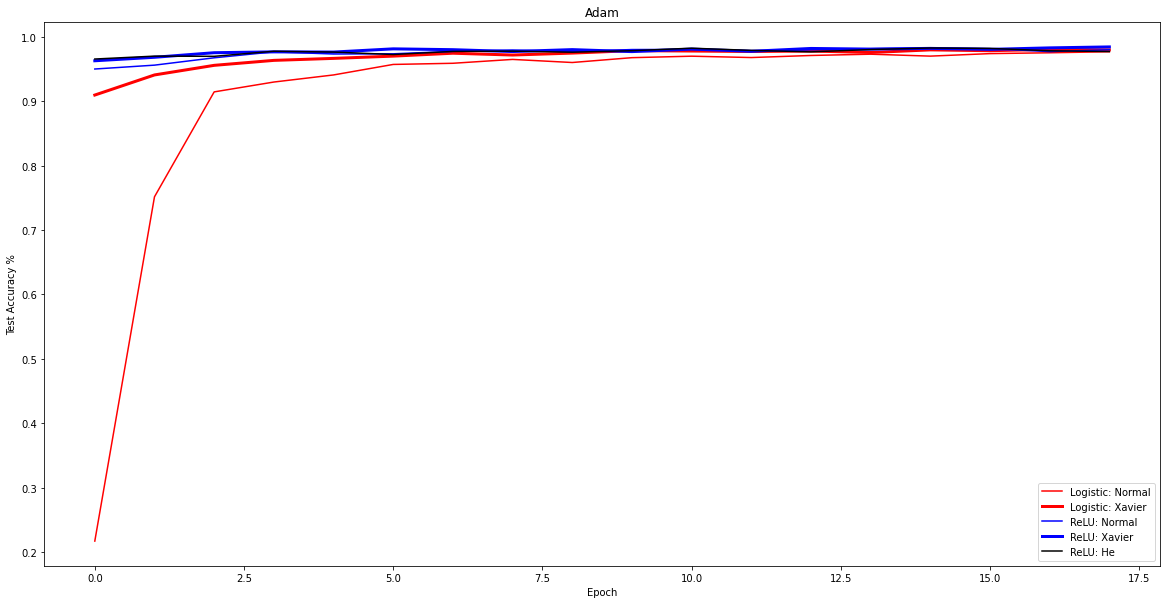

In [ ]:
#loss_train = history.history['accuracy']
test_acc = historya.history['val_accuracy'][0:18]
test_acc1 = historya1.history['val_accuracy'][0:18]
test_acc2 = historya2.history['val_accuracy'][0:18]
test_acc3 = historya3.history['val_accuracy'][0:18]
test_acc4 = historya4.history['val_accuracy'][0:18]

epochs = range(0,18)
plt.figure(figsize=(20,10))
plt.plot(epochs, test_acc, 'r', label='Logistic: Normal')
plt.plot(epochs, test_acc1, 'r', label='Logistic: Xavier', linewidth=3)
plt.plot(epochs, test_acc2, 'b', label='ReLU: Normal')
plt.plot(epochs, test_acc3, 'b', label='ReLU: Xavier', linewidth=3)
plt.plot(epochs, test_acc4, 'black', label='ReLU: He')
plt.title('Adam')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy %')
plt.legend()
plt.show()

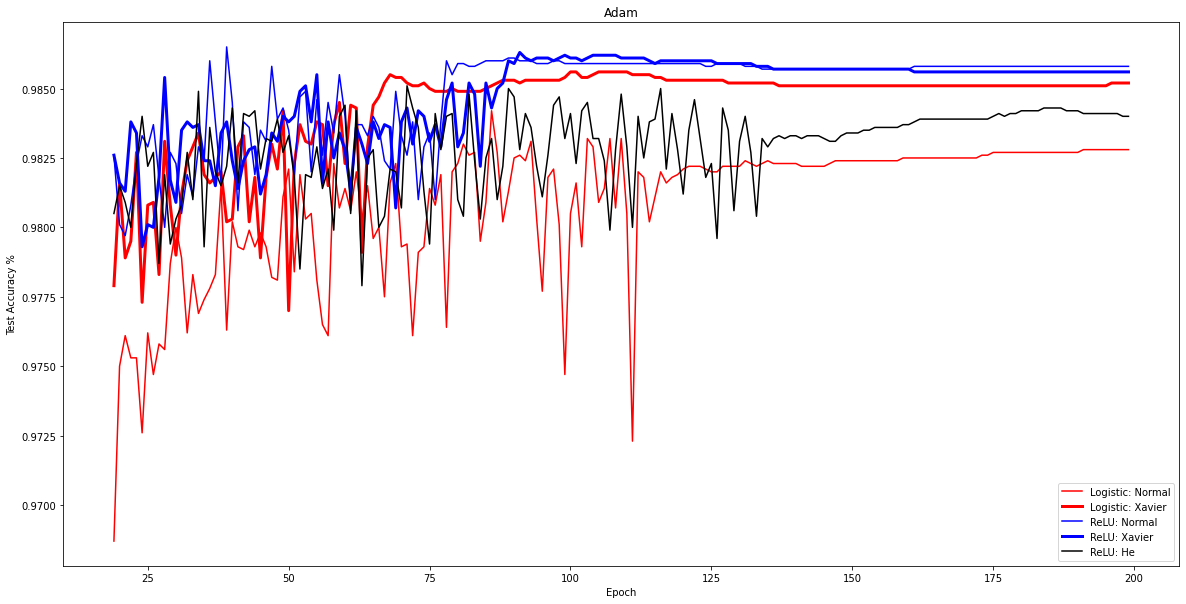

In [ ]:
#loss_train = history.history['accuracy']
test_acc = historya.history['val_accuracy'][19:]
test_acc1 = historya1.history['val_accuracy'][19:]
test_acc2 = historya2.history['val_accuracy'][19:]
test_acc3 = historya3.history['val_accuracy'][19:]
test_acc4 = historya4.history['val_accuracy'][19:]

epochs = range(19,200)
plt.figure(figsize=(20,10))
plt.plot(epochs, test_acc, 'r', label='Logistic: Normal')
plt.plot(epochs, test_acc1, 'r', label='Logistic: Xavier', linewidth=3)
plt.plot(epochs, test_acc2, 'b', label='ReLU: Normal')
plt.plot(epochs, test_acc3, 'b', label='ReLU: Xavier', linewidth=3)
plt.plot(epochs, test_acc4, 'black', label='ReLU: He')
plt.title('Adam')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy %')
plt.legend()
plt.show()

# Problem 4

### Activation function: the logistic sigmoid function; initialization: Xavier initializer; no dropout

In [ ]:
shape = (28, 28) # Define shape of input for Keras model

init = tf.keras.initializers.GlorotNormal(seed=None)

model = keras.Sequential(
    [
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=init)
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1

In [ ]:
opt = keras.optimizers.Adam()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=128, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
469/469 [==============================] - 2s 5ms/step - loss: 1.0706 - accuracy: 0.5963 - val_loss: 0.3144 - val_accuracy: 0.9059
Epoch 2/500
469/469 [==============================] - 2s 4ms/step - loss: 0.2430 - accuracy: 0.9272 - val_loss: 0.1820 - val_accuracy: 0.9432
Epoch 3/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1600 - accuracy: 0.9518 - val_loss: 0.1574 - val_accuracy: 0.9541
Epoch 4/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1205 - accuracy: 0.9640 - val_loss: 0.1376 - val_accuracy: 0.9572
Epoch 5/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0967 - accuracy: 0.9710 - val_loss: 0.1078 - val_accuracy: 0.9700
Epoch 6/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0774 - accuracy: 0.9765 - val_loss: 0.1397 - val_accuracy: 0.9598
Epoch 7/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0657 - accuracy: 0.9798 - val_loss: 0.1110 - val_accuracy: 0.9693

### Activation function: the logistic sigmoid function; initialization: Xavier initializer; with dropout rate: 0.2 for the first layer and 0.5 for the other hidden layers

In [ ]:
shape = (28, 28) # Define shape of input for Keras model

init = tf.keras.initializers.GlorotNormal(seed=None)

model = keras.Sequential(
    [
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=init),
        tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=init)
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)             

In [ ]:
opt = keras.optimizers.Adam()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
historyd = model.fit(X_train, y_train, batch_size=128, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
469/469 [==============================] - 2s 5ms/step - loss: 1.1013 - accuracy: 0.6043 - val_loss: 0.3344 - val_accuracy: 0.8984
Epoch 2/500
469/469 [==============================] - 2s 4ms/step - loss: 0.3512 - accuracy: 0.8927 - val_loss: 0.2051 - val_accuracy: 0.9374
Epoch 3/500
469/469 [==============================] - 2s 4ms/step - loss: 0.2577 - accuracy: 0.9219 - val_loss: 0.1625 - val_accuracy: 0.9520
Epoch 4/500
469/469 [==============================] - 2s 4ms/step - loss: 0.2136 - accuracy: 0.9355 - val_loss: 0.1271 - val_accuracy: 0.9629
Epoch 5/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1861 - accuracy: 0.9447 - val_loss: 0.1187 - val_accuracy: 0.9653
Epoch 6/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1641 - accuracy: 0.9511 - val_loss: 0.1132 - val_accuracy: 0.9693
Epoch 7/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1524 - accuracy: 0.9538 - val_loss: 0.1031 - val_accuracy: 0.9699

### Activation function: ReLU; initialization: Kaiming He’s initializer; no dropout

In [ ]:
shape = (28, 28) # Define shape of input for Keras model

init = tf.keras.initializers.HeNormal(seed=None)

model = keras.Sequential(
    [
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=init)
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1

In [ ]:
opt = keras.optimizers.Adam()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
history1 = model.fit(X_train, y_train, batch_size=128, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
469/469 [==============================] - 2s 5ms/step - loss: 0.2249 - accuracy: 0.9318 - val_loss: 0.1190 - val_accuracy: 0.9646
Epoch 2/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0928 - accuracy: 0.9729 - val_loss: 0.1528 - val_accuracy: 0.9613
Epoch 3/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0674 - accuracy: 0.9799 - val_loss: 0.0949 - val_accuracy: 0.9724
Epoch 4/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0508 - accuracy: 0.9849 - val_loss: 0.0775 - val_accuracy: 0.9781
Epoch 5/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0445 - accuracy: 0.9864 - val_loss: 0.0799 - val_accuracy: 0.9808
Epoch 6/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0368 - accuracy: 0.9893 - val_loss: 0.0847 - val_accuracy: 0.9801
Epoch 7/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0339 - accuracy: 0.9903 - val_loss: 0.0791 - val_accuracy: 0.9817

### Activation function: ReLU; initialization: Kaiming He’s initializer; with dropout rate: 0.2 for the first layer and 0.5 for the other hidden layers

In [ ]:
shape = (28, 28) # Define shape of input for Keras model

init = tf.keras.initializers.HeNormal(seed=None)

model = keras.Sequential(
    [
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=init)
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)             

In [ ]:
opt = keras.optimizers.Adam()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
historyd1 = model.fit(X_train, y_train, batch_size=128, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
469/469 [==============================] - 2s 5ms/step - loss: 0.6479 - accuracy: 0.7908 - val_loss: 0.1693 - val_accuracy: 0.9496
Epoch 2/500
469/469 [==============================] - 2s 4ms/step - loss: 0.2751 - accuracy: 0.9209 - val_loss: 0.1315 - val_accuracy: 0.9623
Epoch 3/500
469/469 [==============================] - 2s 4ms/step - loss: 0.2158 - accuracy: 0.9384 - val_loss: 0.1165 - val_accuracy: 0.9685
Epoch 4/500
469/469 [==============================] - 2s 5ms/step - loss: 0.1927 - accuracy: 0.9469 - val_loss: 0.0935 - val_accuracy: 0.9730
Epoch 5/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1760 - accuracy: 0.9513 - val_loss: 0.0990 - val_accuracy: 0.9713
Epoch 6/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1542 - accuracy: 0.9571 - val_loss: 0.0919 - val_accuracy: 0.9744
Epoch 7/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1487 - accuracy: 0.9599 - val_loss: 0.0844 - val_accuracy: 0.9766

### Visualize Dropout

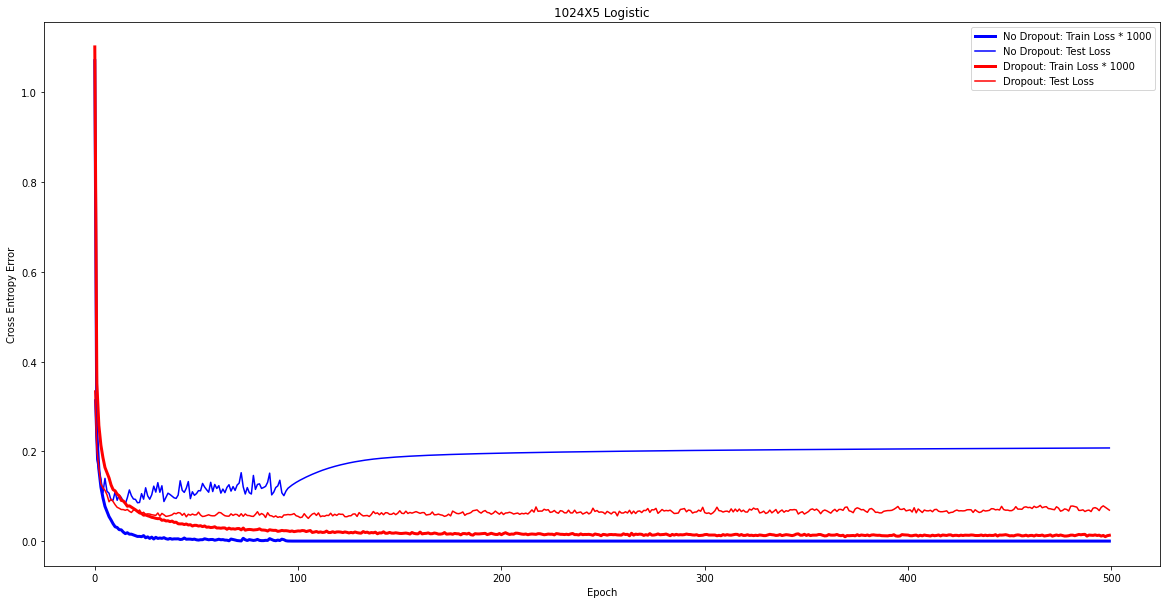

In [ ]:
train_err = history.history['loss']
test_err = history.history['val_loss']
train_errd = historyd.history['loss']
test_errd = historyd.history['val_loss']


epochs = range(0,500)
plt.figure(figsize=(20,10))
plt.plot(epochs, train_err, 'b', label='No Dropout: Train Loss * 1000', linewidth=3)
plt.plot(epochs, test_err, 'b', label='No Dropout: Test Loss')
plt.plot(epochs, train_errd, 'r', label='Dropout: Train Loss * 1000', linewidth=3)
plt.plot(epochs, test_errd, 'r', label='Dropout: Test Loss')
plt.title('1024X5 Logistic')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Error')
plt.legend()
plt.show()

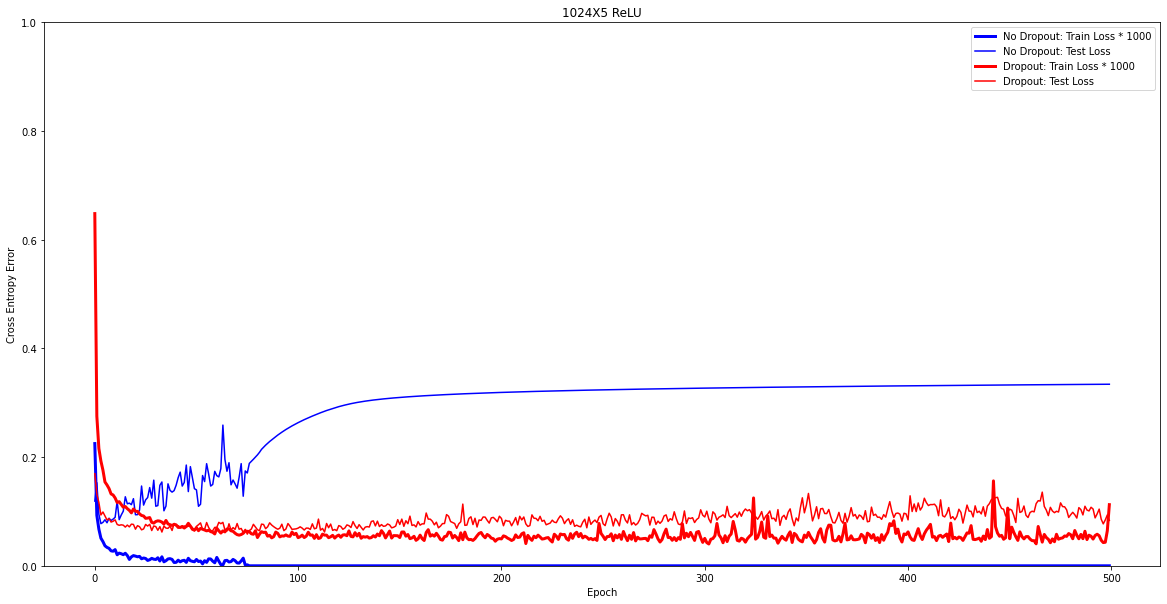

In [ ]:
train_err = history1.history['loss']
test_err = history1.history['val_loss']
train_errd = historyd1.history['loss']
test_errd = historyd1.history['val_loss']


epochs = range(0,500)
plt.figure(figsize=(20,10))
plt.axis([None, None, 0, 1])
plt.plot(epochs, train_err, 'b', label='No Dropout: Train Loss * 1000', linewidth=3)
plt.plot(epochs, test_err, 'b', label='No Dropout: Test Loss')
plt.plot(epochs, train_errd, 'r', label='Dropout: Train Loss * 1000', linewidth=3)
plt.plot(epochs, test_errd, 'r', label='Dropout: Test Loss')
plt.title('1024X5 ReLU')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Error')
plt.legend()
plt.show()